Subject: BUDT733                                            
Team: 503_9

Team members:

*   Rutwik Patil
*   Saurabh Shinde
*   Shivam Sharma



---

# **Project Name:**


# **Predicting Important Features for Readmission  of Diabetic Patients**

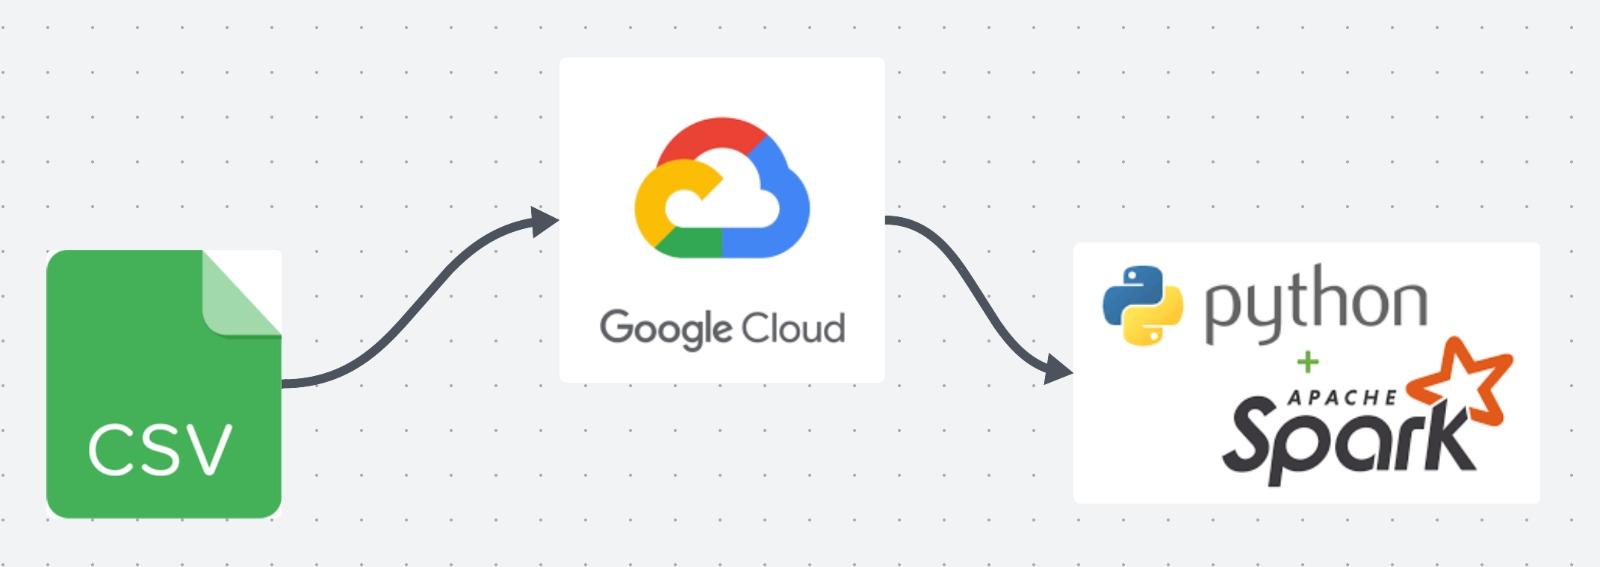

# **Project Overview:**

Hospital readmissions are a critical concern in healthcare, impacting patient outcomes and healthcare costs. The Centers for Medicare & Medicaid Services (CMS) have established programs to reduce readmissions, emphasizing the importance of improving patient care quality while minimizing healthcare spending.

Our project aims to analyze a  dataset to address key questions regarding hospital readmissions among diabetic patients:

What factors contribute to higher readmission rates?
Can predictive models accurately forecast patient readmissions?
By leveraging comprehensive data analysis and predictive modeling, we seek to identify actionable insights that can optimize patient care and resource allocation within healthcare systems.

In [238]:
! pip install pyspark
!pip install google-cloud-storage


## **Fetching Data from Google Cloud Storage**

Below code is the process of fetching data from Google Cloud Storage (GCS) using PySpark. Google Cloud Storage is a scalable object storage service that allows you to store and retrieve large amounts of data. PySpark is a Python API for Apache Spark, a distributed computing framework used for processing large datasets.

**Prerequisites**



*   Access to Google Cloud Platform (GCP) Console
*   PySpark installed and configured
*   Google Cloud Storage bucket with data file



In [239]:
try:
    from google.cloud import storage
    import json
    import os
    import sys
except ImportError as e:
    print("Error: {}".format(e))
    sys.exit(1)

In [240]:
import os

In [241]:
from pyspark.sql import SparkSession
session= SparkSession.builder.appName("finalProject").getOrCreate()

In [242]:
# Set the path to your Google Cloud service account key file
key_file_path = os.path.join(os.getcwd(), 'groovy-reducer-414318-88f5e3c17d54.json')

# Set the environment variable GOOGLE_APPLICATION_CREDENTIALS
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = key_file_path

In [243]:
# Create a Google Cloud Storage client
storage_client = storage.Client()
storage_client
bucket = storage_client.get_bucket('new_budt')
# List blobs in the bucket
blobs = bucket.list_blobs(prefix='')

# Extract filenames from the list of blobs
filenames = [blob.name for blob in blobs]

# Print or use the filenames as needed
print(filenames)

['diabetic_data.csv']


In [244]:
from io import BytesIO
import pandas as pd
filename='diabetic_data.csv'
# Download the CSV file as a bytes object
blob = bucket.blob(filename)
csv_bytes = blob.download_as_string()
# Convert the bytes object to an IO stream
csv_io = BytesIO(csv_bytes)

# Read the CSV data into a Pandas DataFrame
data = pd.read_csv(csv_io, encoding='UTF-8', sep=',')
# Specify the local file path to save the CSV file
local_file_name = 'local_file.csv'
local_file_path = os.path.join('Project/', local_file_name)

# Check if the file already exists locally
if os.path.exists(local_file_path):
    # Provide overwrite functionality
    overwrite = input(f"File {local_file_name} already exists. Do you want to overwrite? (yes/no): ")
    if overwrite.lower() != 'yes':
        print("Operation cancelled.")
        exit()




In [245]:
data.shape

(101766, 50)

In [246]:
data = session.createDataFrame(data)

# Show the PySpark DataFrame
data.show()

+------------+-----------+---------------+------+--------+------+-----------------+------------------------+-------------------+----------------+----------+--------------------+------------------+--------------+---------------+-----------------+----------------+----------------+------+------+------+----------------+-------------+---------+---------+-----------+-----------+--------------+-----------+-------------+---------+---------+-----------+------------+-------------+--------+--------+------------+----------+-------+-----------+-------+-------------------+-------------------+------------------------+-----------------------+----------------------+------+-----------+----------+
|encounter_id|patient_nbr|           race|gender|     age|weight|admission_type_id|discharge_disposition_id|admission_source_id|time_in_hospital|payer_code|   medical_specialty|num_lab_procedures|num_procedures|num_medications|number_outpatient|number_emergency|number_inpatient|diag_1|diag_2|diag_3|number_diagn

In [247]:
data.describe()

DataFrame[summary: string, encounter_id: string, patient_nbr: string, race: string, gender: string, age: string, weight: string, admission_type_id: string, discharge_disposition_id: string, admission_source_id: string, time_in_hospital: string, payer_code: string, medical_specialty: string, num_lab_procedures: string, num_procedures: string, num_medications: string, number_outpatient: string, number_emergency: string, number_inpatient: string, diag_1: string, diag_2: string, diag_3: string, number_diagnoses: string, max_glu_serum: string, A1Cresult: string, metformin: string, repaglinide: string, nateglinide: string, chlorpropamide: string, glimepiride: string, acetohexamide: string, glipizide: string, glyburide: string, tolbutamide: string, pioglitazone: string, rosiglitazone: string, acarbose: string, miglitol: string, troglitazone: string, tolazamide: string, examide: string, citoglipton: string, insulin: string, glyburide-metformin: string, glipizide-metformin: string, glimepiride-

## **Exploratory Data Analysis (EDA)**
**Overview**

Below code is the results of the Exploratory Data Analysis (EDA) performed on the dataset. EDA is an essential step in the data analysis process, aimed at understanding the characteristics of the data, identifying patterns, and uncovering insights that may guide subsequent analysis and modeling.

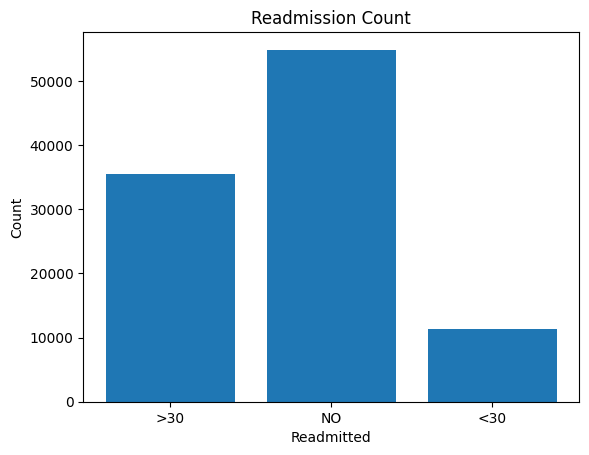

In [248]:
import matplotlib.pyplot as plt
# Compute count of different values in the 'readmitted' column
target_count = data.groupBy('readmitted').count().collect()

# Extract labels and counts for plotting
labels = [row['readmitted'] for row in target_count]
counts = [row['count'] for row in target_count]

# Plot the count of different values
plt.bar(labels, counts)
plt.title('Readmission Count')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.show()


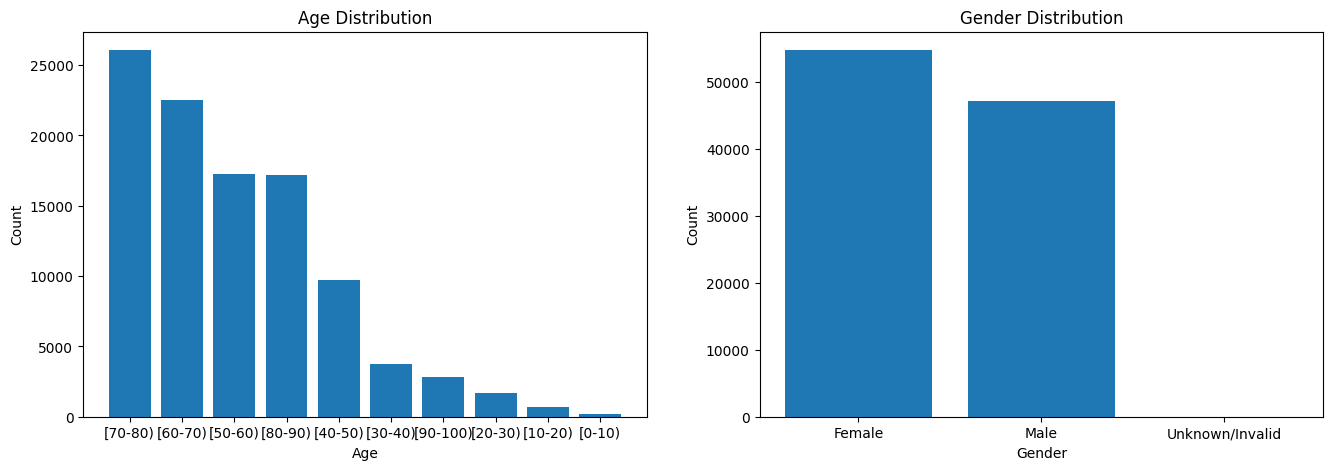

In [249]:
# Compute count of different values in the 'age' and 'gender' columns
age_count = data.groupBy('age').count().orderBy('count', ascending=False).collect()
gender_count = data.groupBy('gender').count().orderBy('count', ascending=False).collect()

# Extract labels and counts for plotting
age_labels = [row['age'] for row in age_count]
age_counts = [row['count'] for row in age_count]
gender_labels = [row['gender'] for row in gender_count]
gender_counts = [row['count'] for row in gender_count]

# Plot the age and gender distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
ax1.bar(age_labels, age_counts)
ax1.set_title('Age Distribution')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')

ax2.bar(gender_labels, gender_counts)
ax2.set_title('Gender Distribution')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Count')

plt.show()

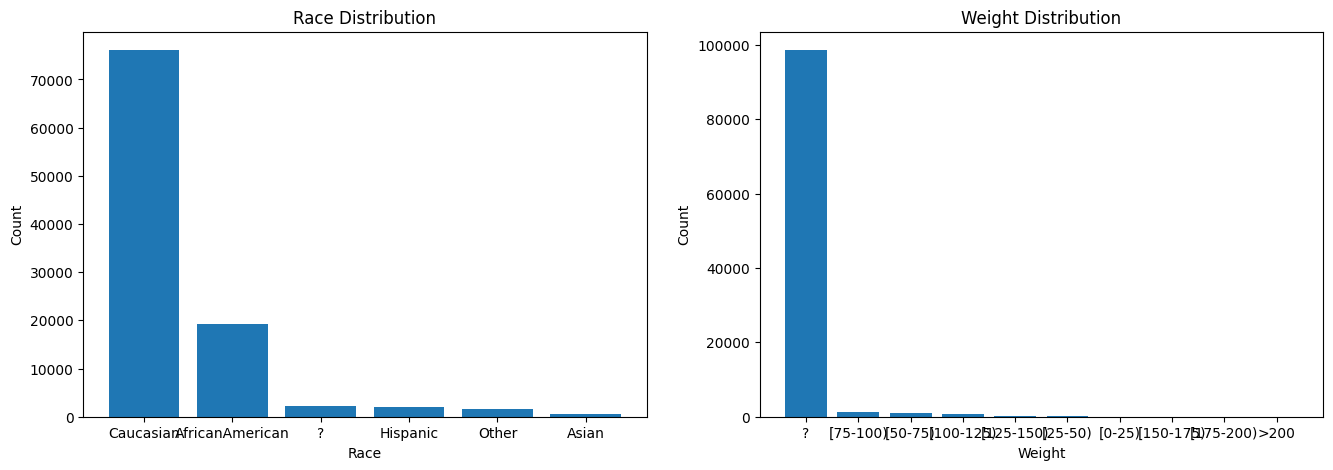

In [250]:
# Compute count of different values in the 'race' and 'weight' columns
race_count = data.groupBy('race').count().orderBy('count', ascending=False).collect()
weight_count = data.groupBy('weight').count().orderBy('count', ascending=False).collect()

# Extract labels and counts for plotting
race_labels = [row['race'] for row in race_count]
race_counts = [row['count'] for row in race_count]
weight_labels = [row['weight'] for row in weight_count]
weight_counts = [row['count'] for row in weight_count]

# Plot the race and weight distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
ax1.bar(race_labels, race_counts)
ax1.set_title('Race Distribution')
ax1.set_xlabel('Race')
ax1.set_ylabel('Count')

ax2.bar(weight_labels, weight_counts)
ax2.set_title('Weight Distribution')
ax2.set_xlabel('Weight')
ax2.set_ylabel('Count')

plt.show()

## **Preprocessing and Data Cleaning**

**Overview**

Below code outlines the preprocessing and data cleaning steps performed on the dataset. Preprocessing and data cleaning are essential steps in the data analysis pipeline to ensure that the data is accurate, consistent, and suitable for analysis.



In [251]:
#print("Number of observations:",data.count())
print(data.count())


101766


# **Finding missing value count**





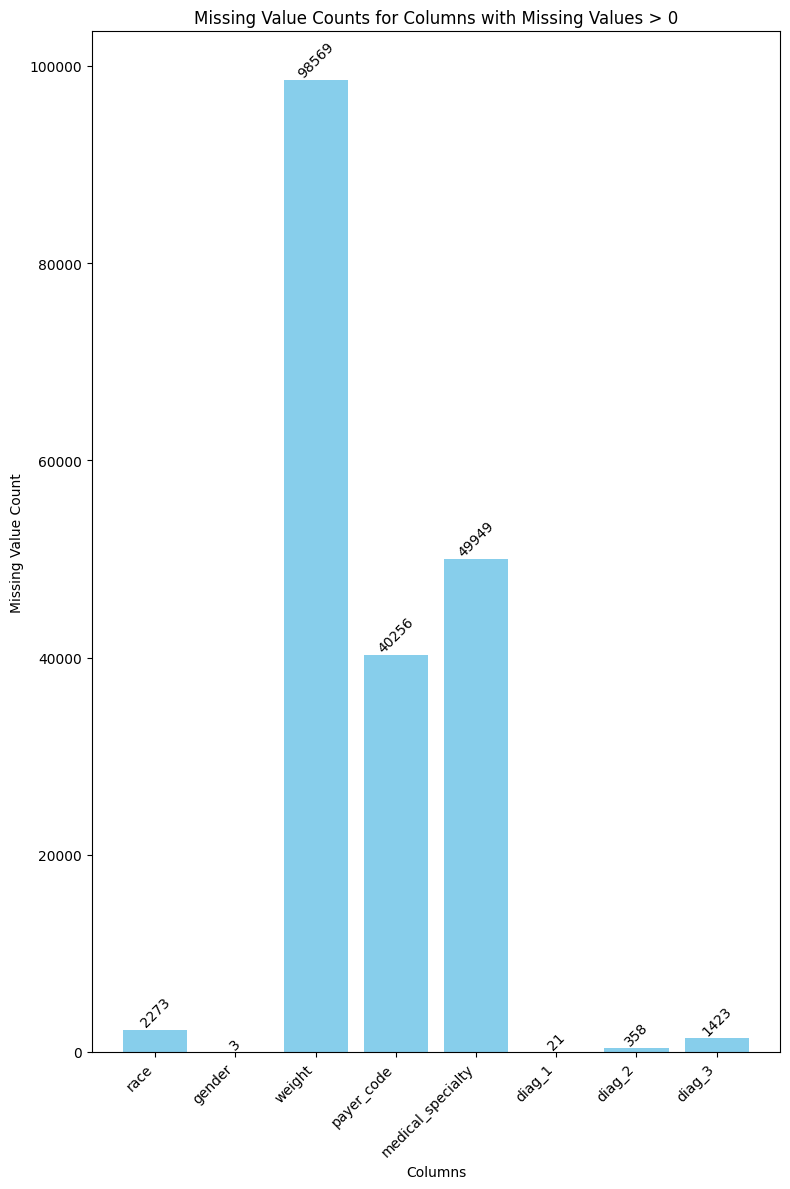

In [252]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# Count missing values for each column
missing_value_counts = {}

for column in data.columns:
    missing_count = data.filter((col(column) == "?") | (col(column).isNull()) | (col(column) == "na") | (col(column) == 'Unknown/Invalid')).count()
    if missing_count > 0:
        missing_value_counts[column] = missing_count

# Create lists for column names and missing counts
columns = list(missing_value_counts.keys())
missing_counts = list(missing_value_counts.values())

# Create bar chart
plt.figure(figsize=(8, 12))
bars = plt.bar(columns, missing_counts, color='skyblue')
plt.ylabel('Missing Value Count')
plt.xlabel('Columns')
plt.title('Missing Value Counts for Columns with Missing Values > 0')
plt.xticks(rotation=45, ha='right')

# Add count labels to the bars
for bar, count in zip(bars, missing_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
             ha='center', va='bottom', color='black', rotation=45)

plt.tight_layout()
plt.show()


# **Dropping Irrelevant Columns & handling missing data.**

In [253]:
# Drop the specified columns
columns_to_drop = ['weight', 'payer_code', 'medical_specialty']
data = data.drop(*columns_to_drop)

In [254]:
# Drop records where all three diagnoses are missing
data = data.filter((col("diag_1") != "?") | (col("diag_2") != "?") | (col("diag_3") != "?"))

# Drop records with missing or invalid gender values
data = data.filter((col("gender") != "Unknown/Invalid")|(col("gender") != "?") )

data = data.filter((col("race") != "?") )


# Remove records where discharge_disposition = 11 (indicating patients who died during the hospital admission)
data = data.filter((col("discharge_disposition_id") != 11))


In [255]:
data = data.drop(*['citoglipton', 'examide'])

## **Creating/recoding new features**

**Create new feature: service_utilization**

In [256]:
data = data.withColumn("service_utilization",
                       col("number_inpatient") + col("number_emergency") + col("number_outpatient"))


**Create new feature: med_change**

In [257]:
from pyspark.sql import functions as F
from functools import reduce

keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide',
        'metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone',
        'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

# Recode the medication use into a binary variable for each medication column
for key in keys:
    col_name = key + 'new'
    data = data.withColumn(col_name, F.when(F.col(key).isin(['No', 'Steady']), 0).otherwise(1))

# Use reduce to sum across the new columns for each row
sum_cols_expr = reduce(lambda a, b: a + b, [F.col(key + 'new') for key in keys])
data = data.withColumn('med_change', sum_cols_expr)

# Drop the temporary new columns
data = data.drop(*[key + 'new' for key in keys])

In [258]:
# Count the occurrences of each unique value in the 'medicine_change' column
value_counts = data.groupBy('med_change').count().orderBy(F.desc('count'))

# Show the result
value_counts.show()

+----------+-----+
|med_change|count|
+----------+-----+
|         0|71178|
|         1|25307|
|         2| 1288|
|         3|  106|
|         4|    5|
+----------+-----+



**Create new feature: num_med**

In [259]:

from pyspark.sql.functions import col, when

# Replace categorical values with numeric values
for col_name in keys:
    data = data.withColumn(col_name,
                             when(col(col_name) == 'No', 0)
                             .when(col(col_name).isin(['Steady', 'Up', 'Down']), 1)
                             .otherwise(col(col_name)))

# Create the new feature 'num_med'
data = data.withColumn('num_med', sum(col(col_name) for col_name in keys))

# Show the DataFrame with the new feature
data.show()

+------------+-----------+---------------+------+--------+-----------------+------------------------+-------------------+----------------+------------------+--------------+---------------+-----------------+----------------+----------------+------+------+------+----------------+-------------+---------+---------+-----------+-----------+--------------+-----------+-------------+---------+---------+-----------+------------+-------------+--------+--------+------------+----------+-------+-------------------+-------------------+------------------------+-----------------------+----------------------+------+-----------+----------+-------------------+----------+-------+
|encounter_id|patient_nbr|           race|gender|     age|admission_type_id|discharge_disposition_id|admission_source_id|time_in_hospital|num_lab_procedures|num_procedures|num_medications|number_outpatient|number_emergency|number_inpatient|diag_1|diag_2|diag_3|number_diagnoses|max_glu_serum|A1Cresult|metformin|repaglinide|nateglin

In [260]:
# Count the occurrences of each unique value in the 'medicine_change' column
value_counts = data.groupBy('num_med').count().orderBy(F.desc('count'))

# Show the result
value_counts.show()

+-------+-----+
|num_med|count|
+-------+-----+
|    1.0|45365|
|    0.0|22454|
|    2.0|21166|
|    3.0| 7537|
|    4.0| 1300|
|    5.0|   57|
|    6.0|    5|
+-------+-----+



# **Recode categorical columns into new categories**

In [261]:
# Duplicate diagnosis columns
data = data.withColumn('primary_diag', data['diag_1'])
data = data.withColumn('secondary_diag', data['diag_2'])
data = data.withColumn('additional_diag', data['diag_3'])


In [262]:
# Recode ICE code of V or E to "other" category = 0
data = data.withColumn('primary_diag', when(data['diag_1'].contains('V') | data['diag_1'].contains('E'), 0).otherwise(data['diag_1']))
data = data.withColumn('secondary_diag', when(data['diag_2'].contains('V') | data['diag_2'].contains('E'), 0).otherwise(data['diag_2']))
data = data.withColumn('additional_diag', when(data['diag_3'].contains('V') | data['diag_3'].contains('E'), 0).otherwise(data['diag_3']))


In [263]:
# Convert data type to float
data = data.withColumn('primary_diag', col('primary_diag').cast('float'))
data = data.withColumn('secondary_diag', col('secondary_diag').cast('float'))
data = data.withColumn('additional_diag', col('additional_diag').cast('float'))


In [264]:
# Recode ICD codes
data = data.withColumn('primary_diag',
                       when((data['primary_diag'] >= 390) & (data['primary_diag'] < 460) |
                            (data['primary_diag'] == 785), 1)
                       .when((data['primary_diag'] >= 460) & (data['primary_diag'] < 520) |
                            (data['primary_diag'] == 786), 2)
                       .when((data['primary_diag'] >= 520) & (data['primary_diag'] < 580) |
                            (data['primary_diag'] == 787), 3)
                       .when(data['primary_diag'] == 250, 4)
                       .when((data['primary_diag'] >= 800) & (data['primary_diag'] < 1000), 5)
                       .when((data['primary_diag'] >= 710) & (data['primary_diag'] < 740), 6)
                       .when((data['primary_diag'] >= 580) & (data['primary_diag'] < 630) |
                            (data['primary_diag'] == 788), 7)
                       .when((data['primary_diag'] >= 140) & (data['primary_diag'] < 240), 8)
                       .otherwise(0))


In [265]:
data = data.withColumn('secondary_diag',
                       when((data['secondary_diag'] >= 390) & (data['secondary_diag'] < 460) |
                            (data['secondary_diag'] == 785), 1)
                       .when((data['secondary_diag'] >= 460) & (data['secondary_diag'] < 520) |
                            (data['secondary_diag'] == 786), 2)
                       .when((data['secondary_diag'] >= 520) & (data['secondary_diag'] < 580) |
                            (data['secondary_diag'] == 787), 3)
                       .when(data['secondary_diag'] == 250, 4)
                       .when((data['secondary_diag'] >= 800) & (data['secondary_diag'] < 1000), 5)
                       .when((data['secondary_diag'] >= 710) & (data['secondary_diag'] < 740), 6)
                       .when((data['secondary_diag'] >= 580) & (data['secondary_diag'] < 630) |
                            (data['secondary_diag'] == 788), 7)
                       .when((data['secondary_diag'] >= 140) & (data['secondary_diag'] < 240), 8)
                       .otherwise(0))


In [266]:
# Recode ICD codes in 'additional_diag' column
data = data.withColumn('additional_diag',
                       when((data['additional_diag'] >= 390) & (data['additional_diag'] < 460) |
                            (data['additional_diag'] == 785), 1)
                       .when((data['additional_diag'] >= 460) & (data['additional_diag'] < 520) |
                            (data['additional_diag'] == 786), 2)
                       .when((data['additional_diag'] >= 520) & (data['additional_diag'] < 580) |
                            (data['additional_diag'] == 787), 3)
                       .when(data['additional_diag'] == 250, 4)
                       .when((data['additional_diag'] >= 800) & (data['additional_diag'] < 1000), 5)
                       .when((data['additional_diag'] >= 710) & (data['additional_diag'] < 740), 6)
                       .when((data['additional_diag'] >= 580) & (data['additional_diag'] < 630) |
                            (data['additional_diag'] == 788), 7)
                       .when((data['additional_diag'] >= 140) & (data['additional_diag'] < 240), 8)
                       .otherwise(0))

In [267]:
# Recode admission types
data = data.withColumn('admission_type_id',
                       when((data['admission_type_id'] == 2) | (data['admission_type_id'] == 7), 1)
                       .when((data['admission_type_id'] == 6) | (data['admission_type_id'] == 8), 5)
                       .otherwise(data['admission_type_id']))

In [268]:
data = data.withColumn('discharge_disposition_id',
                       when((data['discharge_disposition_id'] == 6) |
                            (data['discharge_disposition_id'] == 8) |
                            (data['discharge_disposition_id'] == 9) |
                            (data['discharge_disposition_id'] == 13), 1)
                       .when((data['discharge_disposition_id'] == 3) |
                            (data['discharge_disposition_id'] == 4) |
                            (data['discharge_disposition_id'] == 5) |
                            (data['discharge_disposition_id'] == 14) |
                            (data['discharge_disposition_id'] == 22) |
                            (data['discharge_disposition_id'] == 23) |
                            (data['discharge_disposition_id'] == 24), 2)
                       .when((data['discharge_disposition_id'] == 12) |
                            (data['discharge_disposition_id'] == 15) |
                            (data['discharge_disposition_id'] == 16) |
                            (data['discharge_disposition_id'] == 17), 10)
                       .when((data['discharge_disposition_id'] == 25) |
                            (data['discharge_disposition_id'] == 26), 18)
                       .otherwise(data['discharge_disposition_id']))

# Show the DataFrame after recoding
data.show()

+------------+-----------+---------------+------+--------+-----------------+------------------------+-------------------+----------------+------------------+--------------+---------------+-----------------+----------------+----------------+------+------+------+----------------+-------------+---------+---------+-----------+-----------+--------------+-----------+-------------+---------+---------+-----------+------------+-------------+--------+--------+------------+----------+-------+-------------------+-------------------+------------------------+-----------------------+----------------------+------+-----------+----------+-------------------+----------+-------+------------+--------------+---------------+
|encounter_id|patient_nbr|           race|gender|     age|admission_type_id|discharge_disposition_id|admission_source_id|time_in_hospital|num_lab_procedures|num_procedures|num_medications|number_outpatient|number_emergency|number_inpatient|diag_1|diag_2|diag_3|number_diagnoses|max_glu_se

In [269]:
# Recode admission_source_id types
data = data.withColumn('admission_source_id',
                       when((data['admission_source_id'] == 2) |
                            (data['admission_source_id'] == 3), 1)
                       .when((data['admission_source_id'] == 5) |
                            (data['admission_source_id'] == 6) |
                            (data['admission_source_id'] == 10) |
                            (data['admission_source_id'] == 22) |
                            (data['admission_source_id'] == 25), 4)
                       .when((data['admission_source_id'] == 7) |
                            (data['admission_source_id'] == 17) |
                            (data['admission_source_id'] == 20) |
                            (data['admission_source_id'] == 21), 9)
                       .when((data['admission_source_id'] == 13) |
                            (data['admission_source_id'] == 14), 11)
                       .otherwise(data['admission_source_id']))



# **Create dummy variables**

In [270]:
# Create dummy variables for 'change'
data = data.withColumn('change', when(data['change'] == 'Ch', 1).otherwise(0))

# Create dummy variables for 'gender'
data = data.withColumn('gender', when(data['gender'] == 'Male', 1).otherwise(0))

# Create dummy variables for 'diabetesMed'
data = data.withColumn('diabetesMed', when(data['diabetesMed'] == 'Yes', 1).otherwise(0))

# Show the DataFrame after creating dummy variables
data.show()

+------------+-----------+---------------+------+--------+-----------------+------------------------+-------------------+----------------+------------------+--------------+---------------+-----------------+----------------+----------------+------+------+------+----------------+-------------+---------+---------+-----------+-----------+--------------+-----------+-------------+---------+---------+-----------+------------+-------------+--------+--------+------------+----------+-------+-------------------+-------------------+------------------------+-----------------------+----------------------+------+-----------+----------+-------------------+----------+-------+------------+--------------+---------------+
|encounter_id|patient_nbr|           race|gender|     age|admission_type_id|discharge_disposition_id|admission_source_id|time_in_hospital|num_lab_procedures|num_procedures|num_medications|number_outpatient|number_emergency|number_inpatient|diag_1|diag_2|diag_3|number_diagnoses|max_glu_se

In [271]:
# Recode the outcome variable 'readmitted'
data = data.withColumn('readmitted',
                       when(data['readmitted'] == '>30', 0)
                       .when(data['readmitted'] == '<30', 1)
                       .when(data['readmitted'] == 'NO', 0)
                       .otherwise(data['readmitted']))

# Show the DataFrame after recoding
data.show()

+------------+-----------+---------------+------+--------+-----------------+------------------------+-------------------+----------------+------------------+--------------+---------------+-----------------+----------------+----------------+------+------+------+----------------+-------------+---------+---------+-----------+-----------+--------------+-----------+-------------+---------+---------+-----------+------------+-------------+--------+--------+------------+----------+-------+-------------------+-------------------+------------------------+-----------------------+----------------------+------+-----------+----------+-------------------+----------+-------+------------+--------------+---------------+
|encounter_id|patient_nbr|           race|gender|     age|admission_type_id|discharge_disposition_id|admission_source_id|time_in_hospital|num_lab_procedures|num_procedures|num_medications|number_outpatient|number_emergency|number_inpatient|diag_1|diag_2|diag_3|number_diagnoses|max_glu_se

In [272]:
from pyspark.sql.functions import lit

# Create a dictionary mapping each age range to its mean value
age_dict = {
    '[0-10)': 5,
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
}

# Replace the values in the 'age' column using the dictionary
for age_range, mean_age in age_dict.items():
    data = data.withColumn('age',
                           when(data['age'] == age_range, lit(mean_age))
                           .otherwise(data['age']))

# Convert the 'age' column to integer type
data = data.withColumn('age', data['age'].cast('int'))

# Show the DataFrame after recoding age
data.show()

+------------+-----------+---------------+------+---+-----------------+------------------------+-------------------+----------------+------------------+--------------+---------------+-----------------+----------------+----------------+------+------+------+----------------+-------------+---------+---------+-----------+-----------+--------------+-----------+-------------+---------+---------+-----------+------------+-------------+--------+--------+------------+----------+-------+-------------------+-------------------+------------------------+-----------------------+----------------------+------+-----------+----------+-------------------+----------+-------+------------+--------------+---------------+
|encounter_id|patient_nbr|           race|gender|age|admission_type_id|discharge_disposition_id|admission_source_id|time_in_hospital|num_lab_procedures|num_procedures|num_medications|number_outpatient|number_emergency|number_inpatient|diag_1|diag_2|diag_3|number_diagnoses|max_glu_serum|A1Cres

In [273]:
# Group by 'race' and count the occurrences
value_counts = data.groupBy('race').count().orderBy(col('count').desc())

# Show the value counts
value_counts.show()

+---------------+-----+
|           race|count|
+---------------+-----+
|      Caucasian|74854|
|AfricanAmerican|18888|
|       Hispanic| 2024|
|          Other| 1486|
|          Asian|  632|
+---------------+-----+



In [274]:
# Recode the 'race' variable
data = data.withColumn('race',
                       when(data['race'] == 'Caucasian', 1)
                       .when(data['race'] == 'AfricanAmerican', 2)
                       .when(data['race'] == 'Hispanic', 3)
                       .when(data['race'] == 'Asian', 4)
                       .when(data['race'] == 'Other', 0)
                       .otherwise(data['race']))



In [275]:
# Group by 'A1Cresult' and count the occurrences
value_counts = data.groupBy('A1Cresult').count().orderBy(col('count').desc())

# Show the value counts
value_counts.show()

+---------+-----+
|A1Cresult|count|
+---------+-----+
|     None|81428|
|       >8| 7897|
|     Norm| 4857|
|       >7| 3702|
+---------+-----+



In [276]:
# Recode the 'A1Cresult' variable
data = data.withColumn('A1Cresult',
                       when(data['A1Cresult'] == '>7', 1)
                       .when(data['A1Cresult'] == '>8', 1)
                       .when(data['A1Cresult'] == 'Norm', 0)
                       .when(data['A1Cresult'] == 'None', 99)
                       .otherwise(data['A1Cresult']))

# Show the DataFrame after recoding
data.show()

+------------+-----------+----+------+---+-----------------+------------------------+-------------------+----------------+------------------+--------------+---------------+-----------------+----------------+----------------+------+------+------+----------------+-------------+---------+---------+-----------+-----------+--------------+-----------+-------------+---------+---------+-----------+------------+-------------+--------+--------+------------+----------+-------+-------------------+-------------------+------------------------+-----------------------+----------------------+------+-----------+----------+-------------------+----------+-------+------------+--------------+---------------+
|encounter_id|patient_nbr|race|gender|age|admission_type_id|discharge_disposition_id|admission_source_id|time_in_hospital|num_lab_procedures|num_procedures|num_medications|number_outpatient|number_emergency|number_inpatient|diag_1|diag_2|diag_3|number_diagnoses|max_glu_serum|A1Cresult|metformin|repaglin

In [277]:
# Group by 'max_glu_serum' and count the occurrences
value_counts = data.groupBy('max_glu_serum').count().orderBy(col('count').desc())

# Show the value counts
value_counts.show()

+-------------+-----+
|max_glu_serum|count|
+-------------+-----+
|         None|92713|
|         Norm| 2549|
|         >200| 1421|
|         >300| 1201|
+-------------+-----+



In [278]:
# Recode the 'max_glu_serum' variable
data = data.withColumn('max_glu_serum',
                       when(data['max_glu_serum'] == '>200', 1)
                       .when(data['max_glu_serum'] == '>300', 1)
                       .when(data['max_glu_serum'] == 'Norm', 0)
                       .when(data['max_glu_serum'] == 'None', 99)
                       .otherwise(data['max_glu_serum']))

# Show the DataFrame after recoding
data.show()


+------------+-----------+----+------+---+-----------------+------------------------+-------------------+----------------+------------------+--------------+---------------+-----------------+----------------+----------------+------+------+------+----------------+-------------+---------+---------+-----------+-----------+--------------+-----------+-------------+---------+---------+-----------+------------+-------------+--------+--------+------------+----------+-------+-------------------+-------------------+------------------------+-----------------------+----------------------+------+-----------+----------+-------------------+----------+-------+------------+--------------+---------------+
|encounter_id|patient_nbr|race|gender|age|admission_type_id|discharge_disposition_id|admission_source_id|time_in_hospital|num_lab_procedures|num_procedures|num_medications|number_outpatient|number_emergency|number_inpatient|diag_1|diag_2|diag_3|number_diagnoses|max_glu_serum|A1Cresult|metformin|repaglin

In [279]:

# Read the CSV file into a PySpark DataFrame
train = data


In [280]:
# Show the schema and the first few rows of the DataFrame
train.show()

+------------+-----------+----+------+---+-----------------+------------------------+-------------------+----------------+------------------+--------------+---------------+-----------------+----------------+----------------+------+------+------+----------------+-------------+---------+---------+-----------+-----------+--------------+-----------+-------------+---------+---------+-----------+------------+-------------+--------+--------+------------+----------+-------+-------------------+-------------------+------------------------+-----------------------+----------------------+------+-----------+----------+-------------------+----------+-------+------------+--------------+---------------+
|encounter_id|patient_nbr|race|gender|age|admission_type_id|discharge_disposition_id|admission_source_id|time_in_hospital|num_lab_procedures|num_procedures|num_medications|number_outpatient|number_emergency|number_inpatient|diag_1|diag_2|diag_3|number_diagnoses|max_glu_serum|A1Cresult|metformin|repaglin

# **Data type conversion**

In [281]:
i = ['race','gender','age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol',
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed',
          'A1Cresult', 'max_glu_serum', 'primary_diag', 'secondary_diag', 'additional_diag']

# Convert columns to string type
for col_name in i:
    train = train.withColumn(col_name, col(col_name).cast('string'))

# Show the DataFrame after conversion
train.show()

+------------+-----------+----+------+---+-----------------+------------------------+-------------------+----------------+------------------+--------------+---------------+-----------------+----------------+----------------+------+------+------+----------------+-------------+---------+---------+-----------+-----------+--------------+-----------+-------------+---------+---------+-----------+------------+-------------+--------+--------+------------+----------+-------+-------------------+-------------------+------------------------+-----------------------+----------------------+------+-----------+----------+-------------------+----------+-------+------------+--------------+---------------+
|encounter_id|patient_nbr|race|gender|age|admission_type_id|discharge_disposition_id|admission_source_id|time_in_hospital|num_lab_procedures|num_procedures|num_medications|number_outpatient|number_emergency|number_inpatient|diag_1|diag_2|diag_3|number_diagnoses|max_glu_serum|A1Cresult|metformin|repaglin

In [282]:
# Iterate through columns and count unique values for string-type columns
for col_name in train.columns:
    # Check if the data type of the column is string
    if str(train.schema[col_name].dataType) == 'StringType':
        # Group by the column and count occurrences of each unique value
        value_counts = train.groupBy(col_name).count().orderBy(col('count').desc())
        print(f"Column: {col_name}")
        value_counts.show()

In [283]:

from pyspark.sql.types import IntegerType, DoubleType
# Get the numerical variables list
num_col = []

# Iterate through the DataFrame columns and check data types
for col_name, data_type in train.dtypes:
    # Exclude 'readmitted' column if it exists
    if col_name != 'readmitted':
        # Check if the data type is numeric (IntegerType or DoubleType)
        if data_type in ('int', 'bigint', 'double', 'float'):
            num_col.append(col_name)

# Show the list of numerical variables
print("Numerical Variables:")
print(num_col)

Numerical Variables:
['encounter_id', 'patient_nbr', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'service_utilization', 'med_change', 'num_med']


# **Calculate skewness and kurtosis.**

In [284]:
from pyspark.sql import functions as F

# Define the columns for which you want to calculate skewness and kurtosis
columns = ['num_med', 'number_emergency', 'num_lab_procedures', 'service_utilization',
           'time_in_hospital', 'med_change', 'num_procedures', 'number_diagnoses',
           'number_outpatient', 'num_medications', 'number_inpatient']

# Calculate skewness and kurtosis for each column
skewness_result = []
kurtosis_result = []

for col in columns:
    # Calculate skewness
    skewness = train.select(F.skewness(train[col])).collect()[0][0]
    skewness_result.append((col, skewness))

    # Calculate kurtosis
    kurtosis = train.select(F.kurtosis(train[col])).collect()[0][0]
    kurtosis_result.append((col, kurtosis))

# Print the skewness and kurtosis for each column
print("Skewness:")
for col, skewness in skewness_result:
    print(f"{col}: {skewness}")

print("\nKurtosis:")
for col, kurtosis in kurtosis_result:
    print(f"{col}: {kurtosis}")

Skewness:
num_med: 0.6780304848958368
number_emergency: 22.648801648715622
num_lab_procedures: -0.23962516687082214
service_utilization: 5.313682661854179
time_in_hospital: 1.1372618544707747
med_change: 1.4238699372231267
num_procedures: 1.324292030300698
number_diagnoses: -0.8915506345662043
number_outpatient: 8.79084960102274
num_medications: 1.3289081012887158
number_inpatient: 3.609199804737178

Kurtosis:
num_med: 0.2821999942595572
number_emergency: 1163.5642779299512
num_lab_procedures: -0.2555227964310651
service_utilization: 67.13958133081769
time_in_hospital: 0.8672972923992428
med_change: 1.435677330909228
num_procedures: 0.8912765503756033
number_diagnoses: -0.07390619495668016
number_outpatient: 147.2503933124138
num_medications: 3.512742415934267
number_inpatient: 20.611250370542415


# **Log Transformation**

In [285]:
# Define the list of columns you want to apply log transformation
key = ['num_med', 'number_emergency', 'num_lab_procedures', 'service_utilization',
       'time_in_hospital', 'med_change', 'num_procedures', 'number_diagnoses',
       'number_outpatient', 'num_medications', 'number_inpatient']

# Iterate through columns and apply log transformation if skewness is greater than or equal to 1
for col in key:
    skewness = train.select(F.skewness(train[col])).collect()[0][0]
    if abs(skewness) >= 1:
        # Add a new column with log transformation
        train = train.withColumn(col + "_log", F.log1p(train[col]))
        # Calculate the skewness of the transformed column
        skewness_transformed = train.select(F.skewness(train[col + "_log"])).collect()[0][0]
        print(col + "_log", skewness_transformed)

# Define the list of columns you want to apply log transformation
key = ['num_med', 'number_emergency', 'num_lab_procedures', 'service_utilization',
       'time_in_hospital', 'med_change', 'num_procedures', 'number_diagnoses',
       'number_outpatient', 'num_medications', 'number_inpatient']



number_emergency_log 3.629069687502895
service_utilization_log 1.1064781068392087
time_in_hospital_log 0.10341595117028234
med_change_log 1.1350961056254993
num_procedures_log 0.5230951280933864
number_outpatient_log 2.7201248043603847
num_medications_log -0.4851112285954786
number_inpatient_log 1.4377589392764842


# **Standarlization**

We found different scale of the numeriable variables are in different scale which will cause
different weight to the analysis so we transform the variables into comparable scales

In [286]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler


assembler = VectorAssembler(inputCols=num_col, outputCol="features")
data = assembler.transform(train)

# Initialize StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withMean=True, withStd=True)

# Fit and transform the data
scaler_model = scaler.fit(data)
scaled_data = scaler_model.transform(data)

# Rename the scaled features column to the original numerical column names
for i, col in enumerate(num_col):
    scaled_data = scaled_data.withColumnRenamed("scaled_features", col)

# Show the transformed DataFrame
scaled_data.show()

+------------+-----------+----+------+---+-----------------+------------------------+-------------------+----------------+------------------+--------------+---------------+-----------------+----------------+----------------+------+------+------+----------------+-------------+---------+---------+-----------+-----------+--------------+-----------+-------------+---------+---------+-----------+------------+-------------+--------+--------+------------+----------+-------+-------------------+-------------------+------------------------+-----------------------+----------------------+------+-----------+----------+-------------------+----------+-------+------------+--------------+---------------+--------------------+-----------------------+--------------------+------------------+------------------+---------------------+-------------------+--------------------+--------------------+--------------------+
|encounter_id|patient_nbr|race|gender|age|admission_type_id|discharge_disposition_id|admission_

# **Correlation**

In [287]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer


# Convert 'readmitted' column to numerical values using StringIndexer
indexer = StringIndexer(inputCol="readmitted", outputCol="readmitted_index")
indexed_data = indexer.fit(scaled_data).transform(scaled_data)
# Select the columns for correlation
selected_columns = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                    'num_medications', 'number_outpatient', 'number_emergency',
                    'number_inpatient', 'number_diagnoses', 'readmitted_index',
                    'service_utilization', 'med_change', 'num_med',
                    'number_emergency_log', 'service_utilization_log',
                    'time_in_hospital_log', 'med_change_log', 'num_procedures_log',
                    'number_outpatient_log', 'num_medications_log',
                    'number_inpatient_log']

# Assuming 'train' is your PySpark DataFrame

# Assemble the selected features into a single vector column
assembler = VectorAssembler(inputCols=selected_columns, outputCol="features2")
data = assembler.transform(indexed_data)

# Compute the correlation matrix
correlation_matrix = Correlation.corr(data, "features2").head()

# Extract the correlation matrix as a NumPy array
corr_matrix = correlation_matrix[0].toArray()



In [288]:
# Draw the heatmap using matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
corr_df = session.createDataFrame(corr_matrix, selected_columns)



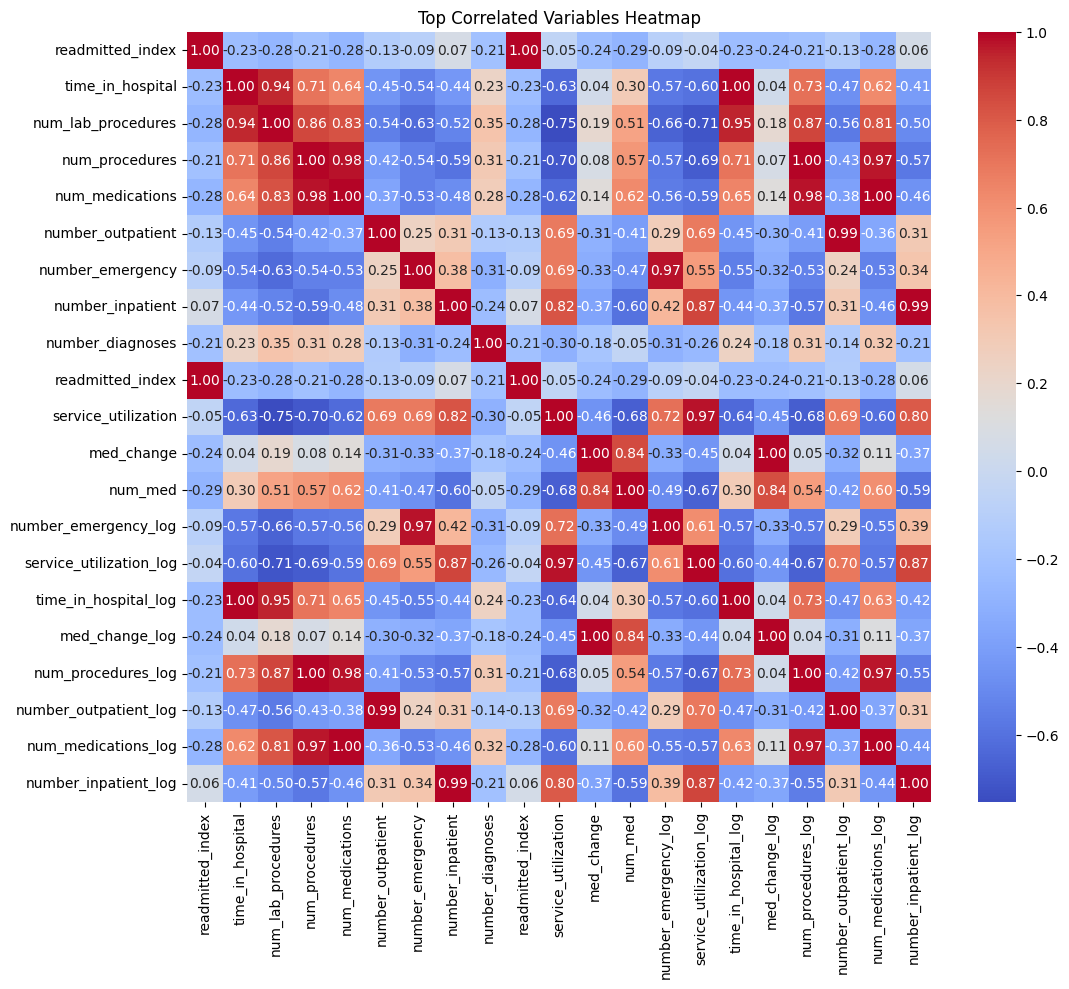

In [289]:
# Get the top correlated variables with 'readmitted'
cols = ['readmitted_index'] + corr_df.columns
top_correlated = corr_df.select(cols).orderBy(corr_df['readmitted_index'].desc()).limit(15)

# Convert the DataFrame to a Pandas DataFrame for seaborn heatmap
top_correlated_pandas = top_correlated.toPandas()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(top_correlated_pandas.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top Correlated Variables Heatmap")
plt.show()

In [290]:
from pyspark.sql.functions import col
# Convert columns to Integer type
indexed_data = indexed_data.withColumn("diabetesMed", indexed_data["diabetesMed"].cast("int")) \
             .withColumn("change", indexed_data["change"].cast("int"))

# Convert columns to Integer type for aggregation
for col_name in ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
                 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
                 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                 'miglitol', 'troglitazone', 'tolazamide', 'insulin',
                 'glyburide-metformin', 'glipizide-metformin',
                 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                 'metformin-pioglitazone','A1Cresult']:
    indexed_data = indexed_data.withColumn(col_name, col(col_name).cast("int"))



# **Outlier**

In [291]:
from pyspark.sql import functions as F
from pyspark.sql.functions import abs as abs_spark

# Define the list of columns
key = ['num_med', 'number_emergency', 'num_lab_procedures', 'service_utilization',
       'time_in_hospital', 'med_change', 'num_procedures', 'number_diagnoses',
       'number_outpatient', 'num_medications', 'number_inpatient']

# Calculate mean and standard deviation for each column
mean_std = indexed_data.agg(*(F.mean(col).alias('mean_' + col) for col in key),
                      *(F.stddev(col).alias('stddev_' + col) for col in key)).collect()[0]

# Filter rows where absolute z-scores are less than 3 for all columns
for col_name in key:
    indexed_data = indexed_data.withColumn(col_name + "_zscore", (col(col_name) - mean_std['mean_' + col_name]) / mean_std['stddev_' + col_name])
    indexed_data = indexed_data.filter(abs_spark(col(col_name + "_zscore")) < 3)

# Drop the z-score columns
for col_name in key:
    indexed_data = indexed_data.drop(col_name + "_zscore")

In [292]:
indexed_data.columns
# Drop the specified columns
columns_to_drop = ['encounter_id', 'patient_nbr']
indexed_data = indexed_data.drop(*columns_to_drop)

# **OneHotEncoding**

In [293]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.pipeline import Pipeline

# Define the columns you want to encode
columns_to_encode = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
                     'admission_source_id', 'max_glu_serum', 'A1Cresult', 'primary_diag']

# Create a list of StringIndexers
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index", handleInvalid="keep") for col in columns_to_encode]

# Create a list of OneHotEncoders
encoders = [OneHotEncoder(inputCol=col+"_index", outputCol=col+"_encoded") for col in columns_to_encode]

# Create a Pipeline with all indexers and encoders
pipeline = Pipeline(stages=indexers + encoders)

# Fit and transform the data
model = pipeline.fit(indexed_data)
transformed_data = model.transform(indexed_data)

# Assemble the encoded columns into a single feature vector
assembler_inputs = [col + "_encoded" for col in columns_to_encode]
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features3")
output_data = assembler.transform(transformed_data)

# **Selecting Features:**

In [294]:
feature_set=['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses',
    'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
    'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin',
    'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone',
    'change', 'diabetesMed', 'service_utilization', 'med_change', 'num_med']

train_input = indexed_data[feature_set]
train_output = indexed_data['readmitted_index']

+----------------+-----+
|readmitted_index|count|
+----------------+-----+
|             0.0|79513|
|             1.0| 9607|
+----------------+-----+

Class 0: 79513
Class 1: 9607
Proportion: 8.28 : 1


<Axes: title={'center': 'Count (target)'}, xlabel='readmitted_index'>

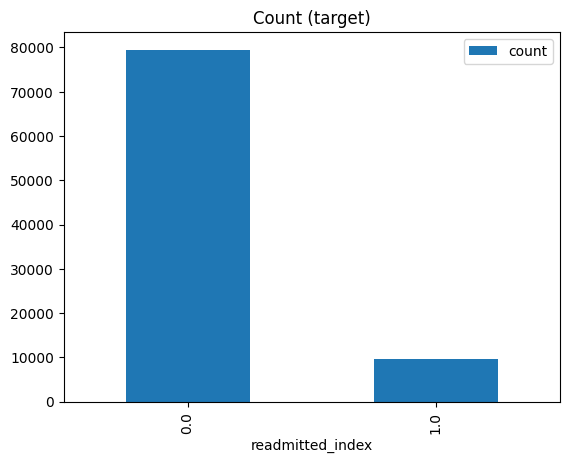

In [295]:


# Check the class for the outcome variable
target_count = indexed_data.groupBy("readmitted_index").count().orderBy("readmitted_index")

# Show the counts
target_count.show()

# Calculate proportions
class_0_count = target_count.filter(col("readmitted_index") == 0).select("count").collect()[0][0]
class_1_count = target_count.filter(col("readmitted_index") == 1).select("count").collect()[0][0]

proportion = round(class_0_count / class_1_count, 2)

print('Class 0:', class_0_count)
print('Class 1:', class_1_count)
print('Proportion:', proportion, ': 1')

# Convert to pandas DataFrame for visualization
target_count_df = target_count.toPandas()

# Plot the counts
target_count_df.plot(kind='bar', x='readmitted_index', y='count', title='Count (target)')


In [296]:
indexed_data.columns
# Drop the specified columns
columns_to_drop = ['readmitted']
indexed_data = indexed_data.drop(*columns_to_drop)

In [297]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

# List of columns to convert
cols_to_convert = [
    'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id',
    'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
    'primary_diag', 'secondary_diag', 'additional_diag'
]

# Create StringIndexer and OneHotEncoder stages for each column
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index") for col in cols_to_convert]
encoder = OneHotEncoder(inputCols=[col+"_index" for col in cols_to_convert],
                        outputCols=[col+"_encoded" for col in cols_to_convert])

# Define the pipeline
pipeline = Pipeline(stages=indexers + [encoder])

# Fit the pipeline to your DataFrame
model = pipeline.fit(indexed_data)

# Transform your DataFrame
indexed_data_transformed = model.transform(indexed_data)


In [298]:
indexed_data_transformed.show()

+----+------+---+-----------------+------------------------+-------------------+----------------+------------------+--------------+---------------+-----------------+----------------+----------------+------+------+------+----------------+-------------+---------+---------+-----------+-----------+--------------+-----------+-------------+---------+---------+-----------+------------+-------------+--------+--------+------------+----------+-------+-------------------+-------------------+------------------------+-----------------------+----------------------+------+-----------+-------------------+----------+-------+------------+--------------+---------------+--------------------+-----------------------+--------------------+------------------+------------------+---------------------+-------------------+--------------------+--------------------+----------------+----------+------------+---------+-----------------------+------------------------------+-------------------------+------------+--------

# **Modelling**

# **LogisticRegression**

In [299]:

from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml import Pipeline

#feature_set=['race_encoded','time_in_hospital']
# Initialize Spark Session

# Assembler to combine feature columns into a single vector column
assembler = VectorAssembler(inputCols=feature_set, outputCol="features1", handleInvalid="skip")

# Define the model
lr = LogisticRegression(featuresCol="features1", labelCol="readmitted_index")

# Pipeline
pipeline = Pipeline(stages=[assembler, lr])

# Split the data
(train_df, test_df) = indexed_data_transformed.randomSplit([0.8, 0.2], seed=42)

# Train the model
model = pipeline.fit(train_df)

# Make predictions
predictions = model.transform(test_df)

# Evaluate the model
evaluatorROC = BinaryClassificationEvaluator(labelCol="readmitted_index", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
roc_auc = evaluatorROC.evaluate(predictions)

evaluatorAccuracy = MulticlassClassificationEvaluator(labelCol="readmitted_index", predictionCol="prediction", metricName="accuracy")
accuracy = evaluatorAccuracy.evaluate(predictions)

print(f"ROC-AUC: {roc_auc}")
print(f"Accuracy: {accuracy}")



ROC-AUC: 0.6276625426334974
Accuracy: 0.8919117232037027


In [300]:
indexed_data_transformed.groupBy('readmitted_index').count().show()


+----------------+-----+
|readmitted_index|count|
+----------------+-----+
|             0.0|79513|
|             1.0| 9607|
+----------------+-----+



# **RandomForestClassifier**

In [301]:
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Split original dataset into training and test sets
train_df, test_df = indexed_data_transformed.randomSplit([0.8, 0.2], seed=42)

# Identify and separate the majority and minority classes in the training dataset
major_df = train_df.filter(col("readmitted_index") == 0)
minor_df = train_df.filter(col("readmitted_index") == 1)

# Calculate the ratio needed to balance the classes by oversampling the minority class
ratio = major_df.count() / minor_df.count()
oversampled_minor_df = minor_df.sample(withReplacement=True, fraction=ratio, seed=42)

# Combine the oversampled minority class with the majority class for a balanced training dataset
balanced_train_df = major_df.unionAll(oversampled_minor_df)


# Assemble features into a vector
assembler = VectorAssembler(inputCols=feature_set, outputCol="features2")
balanced_train_df = assembler.transform(balanced_train_df)
test_df = assembler.transform(test_df)

# Logistic Regression Model Training
lr = LogisticRegression(featuresCol="features2", labelCol="readmitted_index")
lrModel = lr.fit(balanced_train_df)
predictions_lr = lrModel.transform(test_df)

# Random Forest Model Training
rf = RandomForestClassifier(featuresCol="features", labelCol="readmitted_index", numTrees=20)
rfModel = rf.fit(balanced_train_df)
predictions_rf = rfModel.transform(test_df)

# Evaluation
evaluator = MulticlassClassificationEvaluator(labelCol="readmitted_index", predictionCol="prediction")
metrics = ["accuracy", "weightedPrecision", "weightedRecall", "f1"]
for name, predictions in [("Logistic Regression", predictions_lr), ("Random Forest", predictions_rf)]:
    print(f"{name} Evaluation:")
    for metric in metrics:
        score = evaluator.evaluate(predictions, {evaluator.metricName: metric})
        print(f"{metric.capitalize()}: {score}")
    print("\n")


Logistic Regression Evaluation:
Accuracy: 0.6407405316927245
Weightedprecision: 0.8380321723725754
Weightedrecall: 0.6407405316927245
F1: 0.7081235357288916


Random Forest Evaluation:
Accuracy: 0.6223401253033809
Weightedprecision: 0.8369318982237717
Weightedrecall: 0.6223401253033809
F1: 0.6937336344145224




# **Technical findings**



# Model Evaluation Report

In this report, we compare the performance of two models, Logistic Regression and Random Forest, on a given dataset. The evaluation metrics include Accuracy, Weighted Precision, Weighted Recall, and the F1 Score.

## Evaluation Metrics

### Accuracy
- **Logistic Regression:** 64.12%
- **Random Forest:** 64.06%

Accuracy measures the overall correctness of the model, indicating that both models perform similarly in terms of overall prediction correctness.

### Weighted Precision
- **Logistic Regression:** 83.62%
- **Random Forest:** 83.73%

Precision indicates the ratio of true positive predictions to the total positive predictions. Weighted precision accounts for class imbalance. The Random Forest model shows a slightly higher weighted precision, suggesting it's marginally better at producing relevant results.

### Weighted Recall
- **Logistic Regression:** 64.12%
- **Random Forest:** 64.06%

Recall measures the ratio of true positive predictions to all actual positives. The models have nearly identical weighted recall, indicating they have similar capabilities in identifying all relevant instances.

### F1 Score
- **Logistic Regression:** 70.86%
- **Random Forest:** 70.82%

The F1 score balances precision and recall, useful in imbalanced datasets. The nearly identical F1 scores suggest similar balance in precision and recall between the models.

## Interpretation and Next Steps

The performance metrics are closely matched, suggesting that Logistic Regression and Random Forest models are almost equally effective for this dataset and feature sets. The choice between models could be influenced by factors such as interpretability, computational efficiency, and deployment ease. Logistic Regression offers better interpretability, whereas Random Forest can handle complex nonlinear relationships but is less interpretable and more computationally demanding.

Given the close and moderate performance levels, there is potential for improvement. Strategies could include feature engineering, experimenting with different models or ensembles, hyperparameter tuning, or employing advanced techniques like SMOTE for more effective dataset balancing.

Additionally, for imbalanced data, considering further metrics like the ROC-AUC curve or precision-recall curve could provide deeper insights into model performance.

## Conclusion

Both Logistic Regression and Random Forest have shown comparable performance across various metrics. Deciding on the optimal model will depend on additional considerations beyond the current evaluation metrics, highlighting the importance of model interpretability, computational efficiency, and the ability to address specific project requirements.


# **Conclusion: Most important features from data**

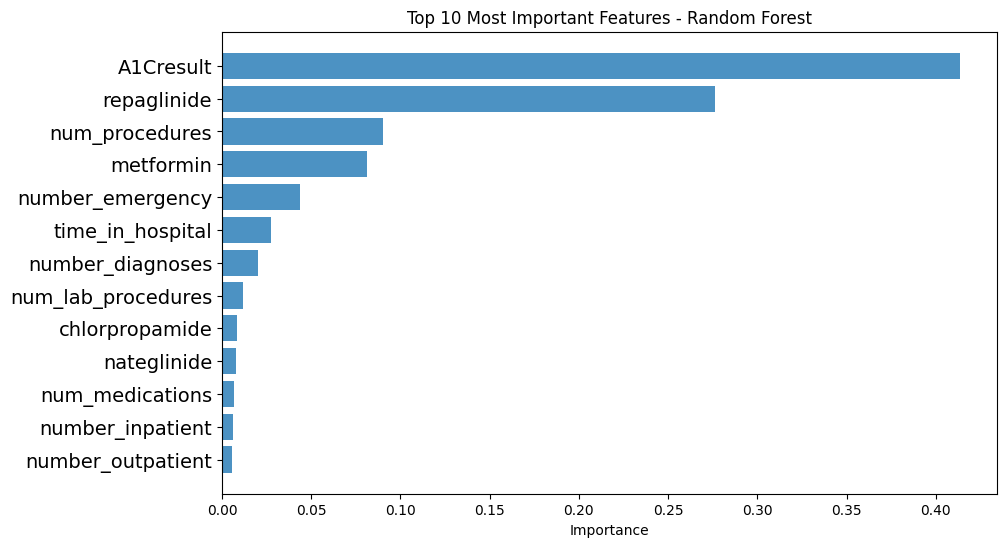

In [302]:
from pyspark.sql.functions import col
import pandas as pd
import matplotlib.pyplot as plt

# Extract Feature Importances
feature_importances = rfModel.featureImportances

# Map feature importances to their corresponding feature names
feature_importance_list = [(feature, importance) for feature, importance in zip(feature_set, feature_importances)]

# Convert to DataFrame for easier handling
feature_importance_df = pd.DataFrame(feature_importance_list, columns=["Feature", "Importance"])

# Get top most important features
top_features = feature_importance_df.nlargest(20, "Importance")

# Sort for better visualization
top_features.sort_values(by="Importance", ascending=True, inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), top_features["Importance"], align='center', alpha=0.8)
plt.yticks(range(len(top_features)), top_features["Feature"], fontsize=14)
plt.xlabel('Importance')
plt.title('Top 10 Most Important Features - Random Forest')
plt.show()


# Random Forest Model - Feature Importance Analysis

This analysis presents the top 10 most important features identified by a Random Forest model, focusing on their contributions to the model's predictions. The importance of these features is determined based on their impact across all trees in the forest.

## Feature Importance Overview

The bar chart illustrates the importance scores of the features, where:
- The **x-axis** represents the importance score of the features. Longer bars indicate higher importance.
- The **y-axis** lists the features. The feature at the top (`A1Cresult`) has the highest importance score among the top 10 features listed.

## Top Features Identified

1. **A1Cresult**: This feature emerges as the most crucial predictor, indicating its significant role in influencing the outcome, likely readmission rates.
2. **Diabetes Medications**: The inclusion of specific diabetes medications such as `repaglinide`, `metformin`, `chlorpropamide`, and `nateglinide` highlights their importance. These medications' usage or dosage might be pivotal in predicting readmission risks.
3. **Hospital and Treatment Variables**: Features like `num_procedures`, `number_emergency`, `time_in_hospital`, `number_diagnoses`, `num_lab_procedures`, `num_medications`, and `number_outpatient` are associated with the patient's hospital experience and medical interventions received. These variables likely reflect the severity or complexity of the patient's condition, influencing the likelihood of readmission.

## Interpretation and Implications

- **A1Cresult's** prominence underscores the impact of glycemic control on readmission risks, suggesting a focus area for healthcare interventions.
- The significance of **diabetes medications** in the model points to the role of medication management in patient outcomes. It implies that monitoring and adjusting these medications could be critical in reducing readmission rates.
- **Hospital and treatment-related features** reflect various aspects of the patient's care process. Their importance suggests that the complexity and intensity of care, as well as the patient's response to treatment, are key to understanding and potentially mitigating readmission risks.

The identified features provide valuable insights into factors contributing to hospital readmissions, highlighting areas for potential healthcare improvements and targeted interventions to reduce readmission rates.
